### The dataset description is given at : https://github.com/benedekrozemberczki/GAM/

In [2]:
!wget https://github.com/benedekrozemberczki/GAM/archive/master.zip

--2019-05-20 08:00:07--  https://github.com/benedekrozemberczki/GAM/archive/master.zip
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/benedekrozemberczki/GAM/zip/master [following]
--2019-05-20 08:00:07--  https://codeload.github.com/benedekrozemberczki/GAM/zip/master
Resolving codeload.github.com (codeload.github.com)... 192.30.253.120
Connecting to codeload.github.com (codeload.github.com)|192.30.253.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [   <=>              ]   2.55M  4.33MB/s    in 0.6s    

2019-05-20 08:00:08 (4.33 MB/s) - ‘master.zip’ saved [2672177]



### Install DGL library

In [3]:
pip install dgl

     |████████████████████████████████| 747kB 9.1MB/s 


In [0]:
import networkx as nx
import dgl
import numpy as np

### Unpack the downloaded zip file 

In [5]:
!unzip master.zip 

Archive:  master.zip
d21d8cf11ac3169bb8bb8023b62eaec4126c888e
   creating: GAM-master/
  inflating: GAM-master/LICENSE      
  inflating: GAM-master/README.md    
  inflating: GAM-master/attention_true.jpg  
  inflating: GAM-master/gam_running.jpg  
   creating: GAM-master/input/
   creating: GAM-master/input/test/
  inflating: GAM-master/input/test/1.json  
  inflating: GAM-master/input/test/10.json  
  inflating: GAM-master/input/test/11.json  
  inflating: GAM-master/input/test/12.json  
  inflating: GAM-master/input/test/13.json  
  inflating: GAM-master/input/test/14.json  
  inflating: GAM-master/input/test/15.json  
  inflating: GAM-master/input/test/16.json  
  inflating: GAM-master/input/test/17.json  
  inflating: GAM-master/input/test/18.json  
  inflating: GAM-master/input/test/19.json  
  inflating: GAM-master/input/test/2.json  
  inflating: GAM-master/input/test/20.json  
  inflating: GAM-master/input/test/21.json  
  inflating: GAM-master/input/test/22.json  
  inflatin

In [6]:
!ls -a GAM-master/

.   attention_true.jpg	input	 logs	 paper.pdf  src
..  gam_running.jpg	LICENSE  output  README.md


In [7]:
!cat GAM-master/input/train/4.json

{"target": 0, "edges": [[0, 15], [0, 21], [0, 28], [0, 33], [0, 41], [0, 46], [0, 50], [0, 53], [0, 63], [0, 72], [0, 83], [0, 94], [1, 17], [1, 33], [1, 49], [1, 57], [1, 63], [1, 70], [1, 77], [1, 81], [1, 87], [2, 19], [2, 30], [2, 35], [2, 37], [2, 41], [2, 89], [2, 95], [2, 96], [3, 12], [3, 32], [3, 33], [3, 40], [3, 64], [3, 89], [4, 5], [4, 27], [4, 33], [4, 41], [4, 43], [4, 65], [4, 66], [4, 72], [4, 85], [4, 86], [4, 98], [5, 7], [5, 10], [5, 12], [5, 38], [5, 46], [5, 59], [5, 67], [5, 99], [6, 16], [6, 18], [6, 19], [6, 43], [6, 54], [6, 70], [6, 91], [6, 94], [7, 9], [7, 15], [7, 38], [7, 40], [7, 51], [7, 62], [7, 66], [8, 30], [8, 53], [8, 66], [8, 77], [8, 81], [8, 92], [8, 93], [8, 99], [9, 16], [9, 19], [9, 25], [9, 40], [9, 54], [9, 74], [9, 79], [9, 90], [10, 11], [10, 16], [10, 20], [10, 29], [10, 30], [10, 53], [10, 79], [11, 31], [11, 33], [11, 37], [11, 46], [11, 63], [11, 74], [12, 36], [12, 55], [12, 94], [13, 16], [14, 33], [14, 45], [14, 51], [14, 53], [14,

### We need to read the input json files and construct the graph

In [0]:
import numpy as np
import json
import glob

In [0]:
train_list, test_list = glob.glob('GAM-master/input/train/*.json'), glob.glob('GAM-master/input/test/*.json') # -- glob function is used to list all the possible files -- #

### Let's check the structure of one file 

In [0]:
with open('GAM-master/input/train/4.json') as json_file:
  data = json.load(json_file)

In [12]:
data.keys()

dict_keys(['target', 'edges', 'labels', 'inverse_labels'])

### Build a function to construct a (graph, label) pair from an input json file

In [0]:
def GraphFromJson(json_name) : 
  
  with open(json_name) as json_file:
     data = json.load(json_file)
  
  n_nodes = len(data['labels'])
  
  g = dgl.DGLGraph()
  g.add_nodes(n_nodes)
  
  
  for iedge in data['edges'] :
    
     g.add_edge(iedge[0], iedge[1])
  
  
  label = data['target']
  
  return (g, label)
  

In [0]:
g, label = GraphFromJson('GAM-master/input/train/21.json')

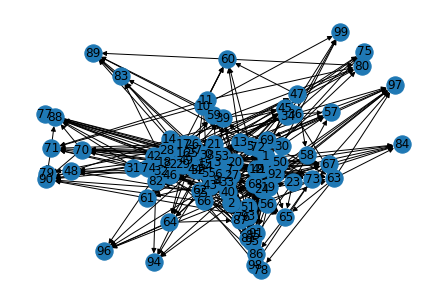

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
nx.draw(g.to_networkx(), with_labels=True)
plt.show()

In [16]:
label

0

# The homework task

## 1. Build the training and testing dataset from the above list of json

## 2. Build to classifiers, one with 3 GN block and another one with 4 GN block

## 3. Do the training for both the models. 

## 4. Figure out which model learns the dataset better by comparing the losses in two cases as well as prediction accuracy on the test dataset.